# Data Analysis

Loading the data

In [73]:
import pandas as pd
data = pd.DataFrame.from_csv('train.csv')

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot

import numpy as np

%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline

In [38]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Missing values

In [39]:
data.isnull().sum()[data.isnull().sum() != 0].sort_values() /len(data) * 100

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageCond       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
Fence           80.753425
Alley           93.767123
MiscFeature     96.301370
PoolQC          99.520548
dtype: float64

### PoolQC

99.52% houses don't have a Pool

Another thing to note about PoolQC is that it is strong related to PoolArea, for those houses without a pool, their "PoolArea" are always 0

In [43]:
data_copy = data.fillna('NA').copy()

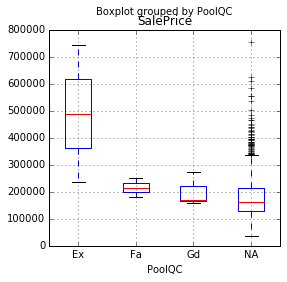

In [56]:
data_copy.boxplot(column='SalePrice', by='PoolQC', figsize=(4,4))

In [50]:
data_copy.groupby('PoolQC')['SalePrice'].describe()

PoolQC       
Ex      count         2.000000
        mean     490000.000000
        std      360624.458405
        min      235000.000000
        25%      362500.000000
        50%      490000.000000
        75%      617500.000000
        max      745000.000000
Fa      count         2.000000
        mean     215500.000000
        std       48790.367902
        min      181000.000000
        25%      198250.000000
        50%      215500.000000
        75%      232750.000000
        max      250000.000000
Gd      count         3.000000
        mean     201990.000000
        std       63441.392639
        min      160000.000000
        25%      165500.000000
        50%      171000.000000
        75%      222985.000000
        max      274970.000000
NA      count      1453.000000
        mean     180404.663455
        std       78168.872519
        min       34900.000000
        25%      129900.000000
        50%      162900.000000
        75%      213500.000000
        max      755000.0

We can see two houses with excellent pool do have higher prices than others, probably this indicates these two houses' other properties are also good, an excellent house should be excellent on all the aspects, right? let's check these two houses' "OverallQual", we are looking a litte bit ahead here, however we will see soon that "OverallQual" is a crucial element in determing the house price

In [52]:
data_copy[data_copy['PoolQC'] == 'Ex']['OverallQual']

Id
198      8
1183    10
Name: OverallQual, dtype: int64

According to the documentation:
    
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
Indeed, these two houses' overall quality are very good! However, prices for houses without pool range from 34900 to 755000, we cannot say houses with pool are more expensive than houses without one. 

Next, let's take a look at PoolArea

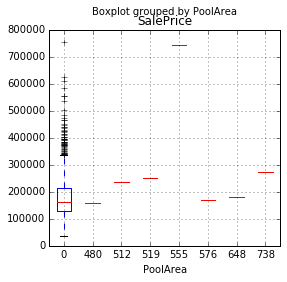

In [57]:
data_copy.boxplot(column='SalePrice', by='PoolArea', figsize=(4, 4))

Again, we cannot find a strong relationship between PoolArea and SalePrice, house with bigger pool doesn't always has a higher sale price, given most of houses don't have pool and the facts we found about PoolQC and PoolArea, we can drop these two columns.

### FireplaceQu

Miscellaneous feature not covered in other categories, from the name and definition we can see this is not really a property of a house, we can throw it away by only looking at the name, but to be safe, let's take a look first

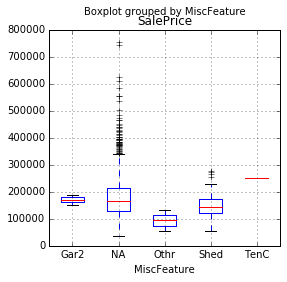

In [59]:
data_copy.boxplot(column='SalePrice', by='MiscFeature', figsize=(4,4))

No valuable information, it doesn't worth spending too much time on this, I bet when you buying a house, this is the last thing to consider

### Alley

Type of alley access to property

Again, from the definition, this is only a good thing to have, we won't give too much weights to it.

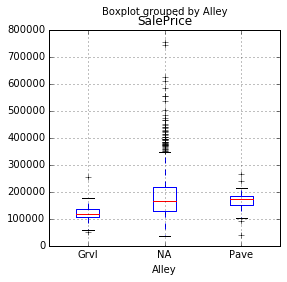

In [60]:
data_copy.boxplot(column='SalePrice', by='Alley', figsize=(4,4))

In [61]:
data_copy.groupby('Alley')['SalePrice'].describe()

Alley       
Grvl   count        50.000000
       mean     122219.080000
       std       34780.780734
       min       52500.000000
       25%      105312.500000
       50%      119500.000000
       75%      136750.000000
       max      256000.000000
NA     count      1369.000000
       mean     183452.131483
       std       80667.145180
       min       34900.000000
       25%      130500.000000
       50%      165000.000000
       75%      217500.000000
       max      755000.000000
Pave   count        41.000000
       mean     168000.585366
       std       38370.375243
       min       40000.000000
       25%      151000.000000
       50%      172500.000000
       75%      185000.000000
       max      265979.000000
dtype: float64

### Fence

Fence Quality

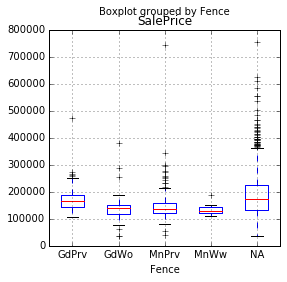

In [63]:
data_copy.boxplot(column='SalePrice', by='Fence', figsize=(4, 4))

### FireplaceQu

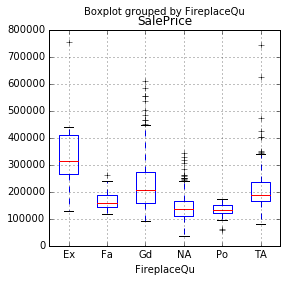

In [65]:
data_copy.boxplot(column='SalePrice', by='FireplaceQu', figsize=(4, 4))

We see that FireplaceQu does have an affect on SalePrice, we cannot throw it away arbitrarily, however, it has nearly 50% missing data, what should we do? 

In [69]:
data_copy.groupby('FireplaceQu')['SalePrice'].describe()

FireplaceQu       
Ex           count        24.000000
             mean     337712.500000
             std      123611.471764
             min      130500.000000
             25%      265070.000000
             50%      314250.000000
             75%      411324.500000
             max      755000.000000
Fa           count        33.000000
             mean     167298.484848
             std       34287.717564
             min      117000.000000
             25%      143000.000000
             50%      158000.000000
             75%      187000.000000
             max      262000.000000
Gd           count       380.000000
             mean     226351.415789
             std       91123.148369
             min       90350.000000
             25%      159671.250000
             50%      206950.000000
             75%      274977.500000
             max      611657.000000
NA           count       690.000000
             mean     141331.482609
             std       44389.786884
         

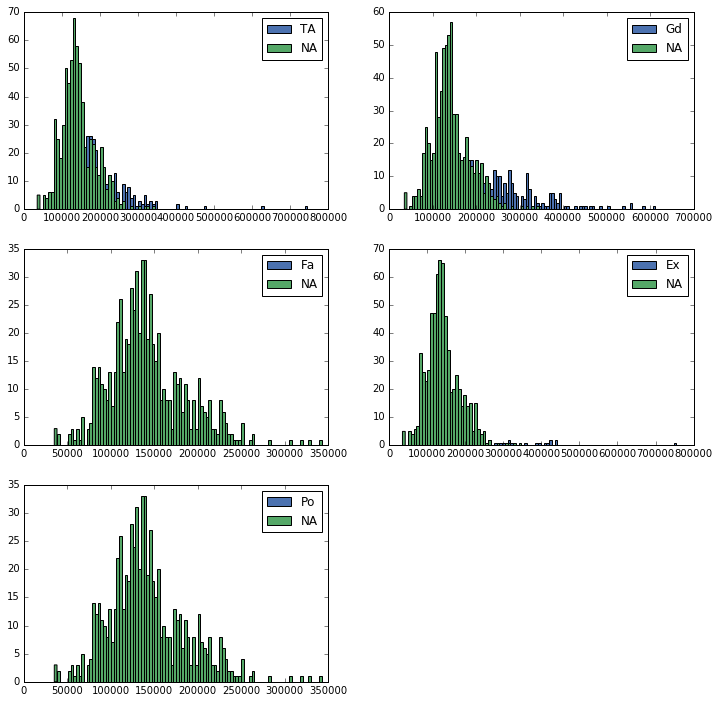

In [119]:
fig = plt.figure(figsize=(12, 12))
for x, condition in enumerate([cond for cond in data_copy['FireplaceQu'].unique() if cond != 'NA']):
    bins = np.linspace(data_copy[data_copy['FireplaceQu'].isin(['NA', condition])]['SalePrice'].min(),
                       data_copy[data_copy['FireplaceQu'].isin(['NA', condition])]['SalePrice'].max(),
                       100)
    fig = plt.subplot(3, 2, x+1)
    fig.hist(data_copy[data_copy['FireplaceQu'] == condition]['SalePrice'], bins, label=condition)
    fig.hist(data_copy[data_copy['FireplaceQu'] == 'NA']['SalePrice'], bins, label='NA')
    fig.legend()

No matter from the statistics and the graph, we can see houses without fireplace have similar price as houses with a poor condition fireplace. Looking at https://www.houselogic.com/organize-maintain/home-maintenance-tips/fireplace-addition-costs/ it does cost about 5000 to install a gas fireplace and over 10000 to install a wood-burning fireplace, it's reasonable for the owner to ask a higher price if he/she has one in house. So we are going to fill na values with 'Po'

By the way, there is another property called Fireplaces which describes how many fireplaces a house has, let's take a look at it before we continue

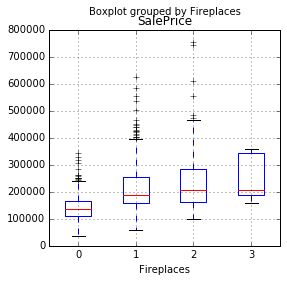

In [121]:
data_copy.boxplot(column='SalePrice', by='Fireplaces', figsize=(4, 4))

We do see a pattern that houses with more fireplaces on average have higher sale prices!

### LotFrontage

Finally, let's investigate LotFrontage as it has roughly 18% missing vlaues.

In [152]:
data_copy.loc[data_copy['LotFrontage'] == 'NA', 'LotFrontage'] = 0
data_copy['LotFrontage'].astype(float).describe()

count    1460.000000
mean       57.623288
std        34.664304
min         0.000000
25%        42.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [155]:
data_copy['LotFrontageGroup'] = data_copy['LotFrontage'].apply(lambda x: x // 20 * 20)

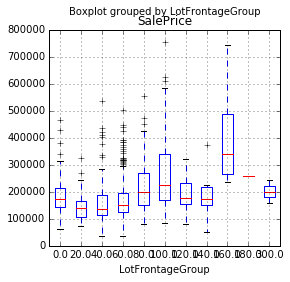

In [156]:
data_copy.boxplot(column='SalePrice', by='LotFrontageGroup', figsize=(4, 4))

On average, house price increases as LotFrontage increases, so we do not drop this feature, instead, we should fill missing values with 0 and convert it to a numeric variable later

Okay, we are pretty much done with missing values, we have checked features which have more than 15% missing values and came up with the strategy to handle them.
In sum, we do the following:
- PoolQC and PoolArea: Drop
- MiscFeature: Drop
- Alley: Drop
- Fence: Drop
- FireplaceQu: Fill with 'Po'

For the remaining features which have missing values we fill them with mean if they are numerical variables or fill them with the most frequent category if they are categorical type